* code working => rotate in 1D
* use 2D to train model
* normalise everything (to have equal weight) => ask because something goes wrong
* read about CNN => interprete the filters
* calculate correlation function (not for all functions)
* not use all lambdas => use in between to check
* Q ~ $\frac{2\pi}{l}$, q ~ $ \lambda_0$ => inelastic scattering

In [1]:
#Should be version 3.6.9
from platform import python_version
print('Currently using Python',python_version())

Currently using Python 3.6.9


In [2]:
#importing libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import source_code as sc
import importlib

#path to the datafile
hdf5_path = 'data/dataset.hdf5'

dir(sc)[:6]

['AnalyseSimulation',
 'GetHydroSamples',
 'GetRandomSamples',
 'MultipleAnalysis',
 'ReadFile',
 'Rotate']

In [3]:
x_train, y_train = sc.ReadFile(hdf5_path,split=False)

In [4]:
#print('> SHAPE OF XTEST: ',x_test.shape)
print('> SHAPE OF XTRAIN: ',x_train.shape)
#print('> SHAPE OF YTEST: ',y_test.shape)
print('> SHAPE OF YTRAIN: ',y_train.shape)

> SHAPE OF XTRAIN:  (25600, 32, 32, 32, 3)
> SHAPE OF YTRAIN:  (25600,)


In [6]:
importlib.reload(sc)
x_train = sc.Scale(x_train)

In [7]:
#Something wrong with the scaling
print('> MEAN: ',np.mean(x_train,axis=(0,1,2,3)))
print('> STDev: ',np.std(x_train,axis=(0,1,2,3)))

> MEAN:  [0.16103153 0.16       0.16006407]
> STDev:  [0.9831429 1.1313708 1.1313862]


In [38]:
sample = x_train[50]

In [39]:
sample

array([[[[0.20511943, 4.680347  , 4.8738055 ],
         [0.32611963, 4.4842806 , 4.5659523 ],
         [0.14828277, 4.6964693 , 4.7499    ],
         ...,
         [0.3306416 , 4.4804697 , 4.855001  ],
         [0.07565484, 4.536911  , 4.840275  ],
         [0.504716  , 4.395277  , 4.807527  ]],

        [[0.35311913, 4.4781785 , 4.849013  ],
         [0.16936761, 4.564997  , 4.844916  ],
         [0.19359511, 4.693457  , 4.705243  ],
         ...,
         [0.42849353, 4.56342   , 4.8013954 ],
         [0.47741523, 4.4789557 , 4.768972  ],
         [0.41258937, 4.5538883 , 4.835939  ]],

        [[0.33376625, 4.6001263 , 4.766059  ],
         [0.54813826, 4.532583  , 4.865554  ],
         [0.5089744 , 4.5158176 , 4.8583913 ],
         ...,
         [0.56155527, 4.3640866 , 4.730656  ],
         [0.43078983, 4.3737316 , 4.8867555 ],
         [0.5386456 , 4.4511175 , 4.758056  ]],

        ...,

        [[0.21915583, 4.710074  , 4.8001823 ],
         [0.10797764, 4.8476067 , 4.503064  ]

In [40]:
test=np.flip(sample)

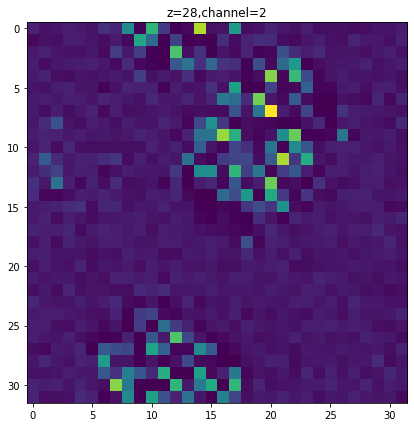

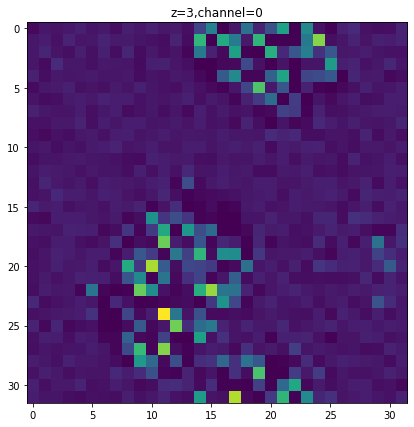

In [41]:
sc.TwoDimHeatmap(test,z=28,c=2)
sc.TwoDimHeatmap(sample,z=3,c=0)

In [75]:
importlib.reload(sc)                      

def RandomRotateSamples(data):
    '''
    Randomly rotates each sample of the dataset over a x,y,z, 
    defined by a random generated vector (seeded)
    '''
    np.random.seed(12345)
    length = data.shape[0]
    randomvector = np.random.randint(0,3,length)
    res = list()
    for x in range(length):
        intermediate = sc.Rotate(data[x],axis=randomvector[x])
        
        #correct up to here. should find something to keep it
        #the same format
        #somehow workes when using list instead and then converting
        #back to an array
        res.append(intermediate)
    return np.asarray(res), randomvector

In [76]:
x_train.shape[0]

25600

In [77]:
res, vec = RandomRotateSamples(x_train)

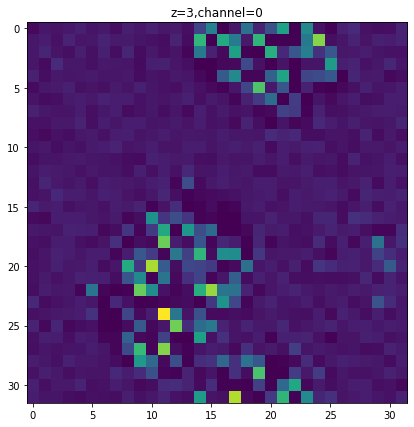

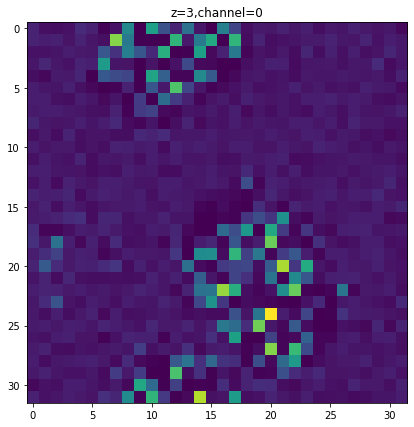

In [78]:
sc.TwoDimHeatmap(sample,z=3,c=0)
sc.TwoDimHeatmap(res[50],z=3,c=0)\

In [63]:
res[50]

0.518355667591095